In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [4]:
cd /gdrive/MyDrive/cell_sampled

/gdrive/MyDrive/cell_sampled


In [5]:
ls

cell_samples.csv


# Importing Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [8]:
df_train=pd.read_csv('cell_samples.csv')
df_train.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Clump        699 non-null    int64 
 1   UnifSize     699 non-null    int64 
 2   UnifShape    699 non-null    int64 
 3   MargAdh      699 non-null    int64 
 4   SingEpiSize  699 non-null    int64 
 5   BareNuc      699 non-null    object
 6   BlandChrom   699 non-null    int64 
 7   NormNucl     699 non-null    int64 
 8   Mit          699 non-null    int64 
 9   Class        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [10]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# EDA

In [11]:
df_train.isna().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [12]:
df_train.columns

Index(['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc',
       'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [13]:
df_train.Class.value_counts()

2    458
4    241
Name: Class, dtype: int64

In [14]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [15]:
binary_cols

['Class']

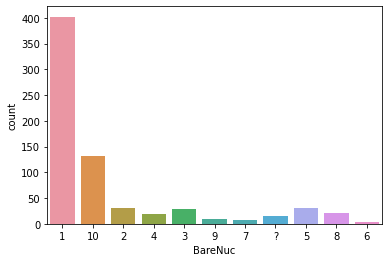

In [16]:
sns.countplot("BareNuc", data=df_train)

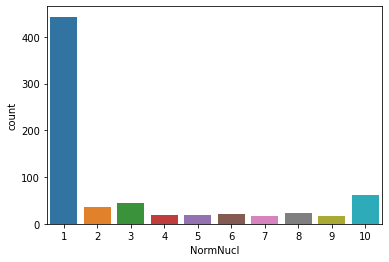

In [17]:
sns.countplot("NormNucl", data=df_train)

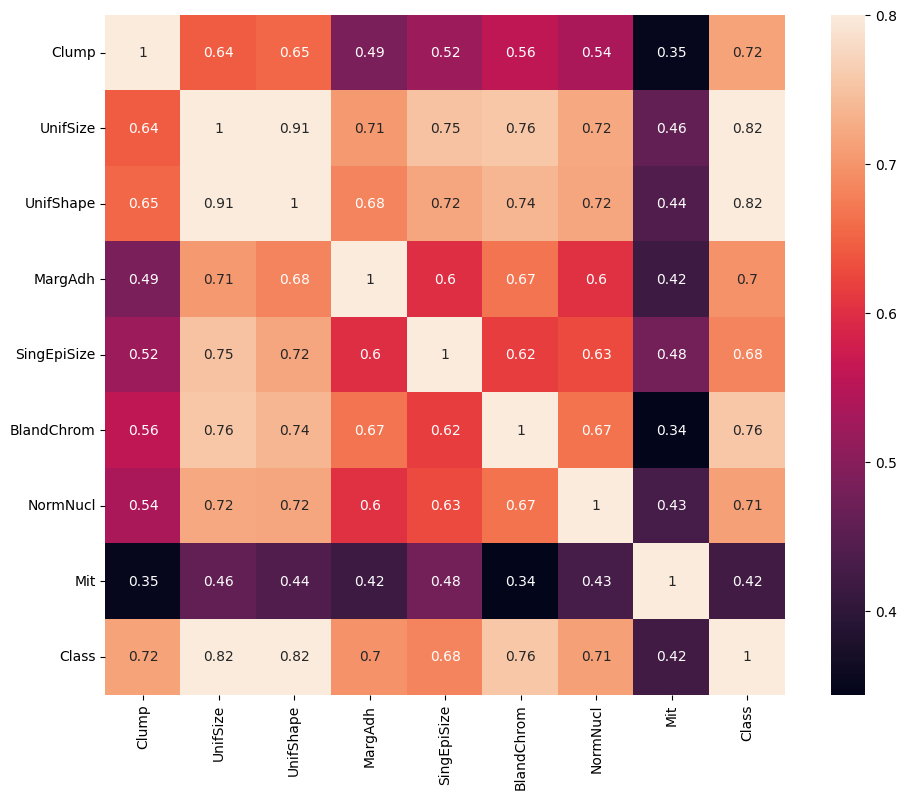

In [18]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

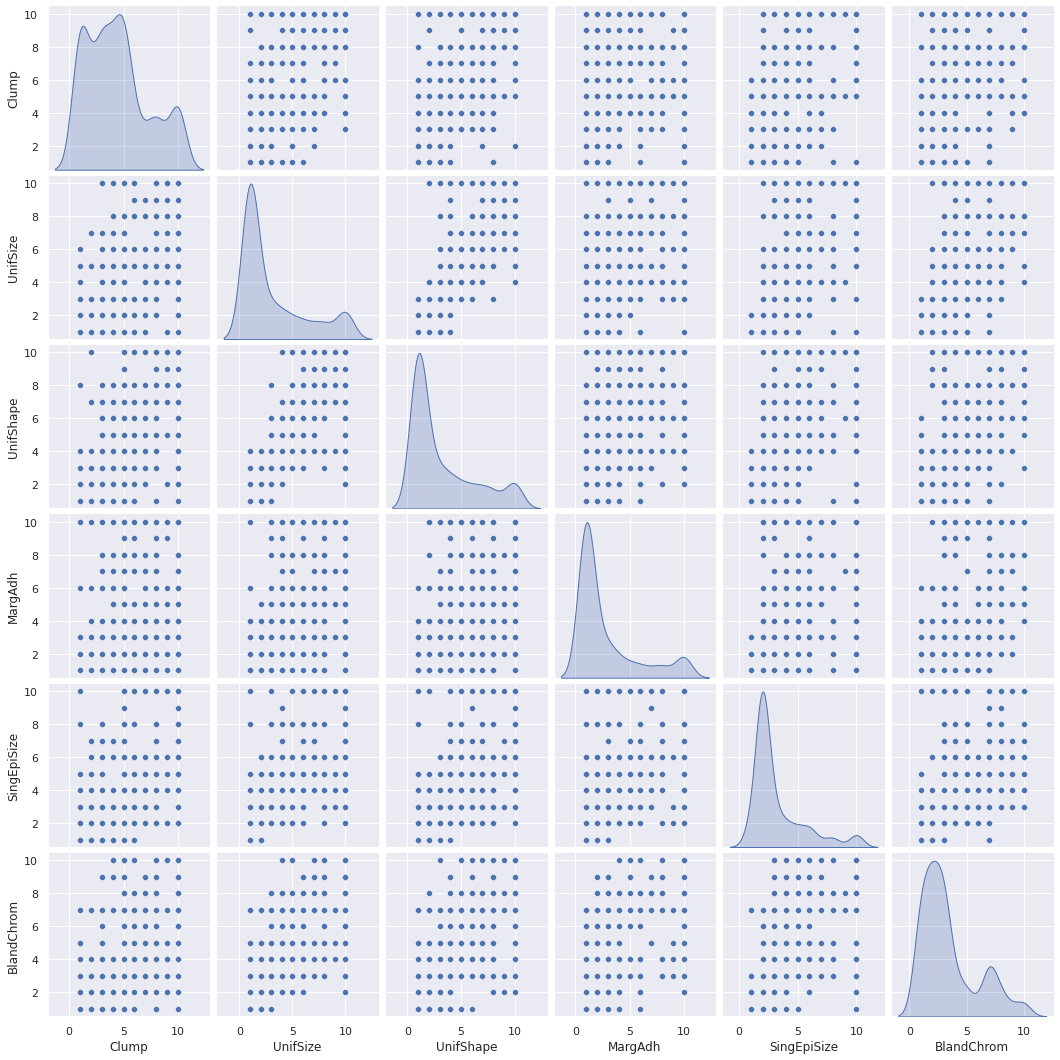

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [24]:

X = df_train.drop(['BareNuc','Class'], axis = 1)
Y = df_train["Class"]
x_Data = X.values
y_Data = Y.values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [28]:
model.score(X_test,y_test)

0.9642857142857143

In [29]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.96428571 0.96428571 0.97321429 0.95535714 0.92792793]


In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.9552772808586762

In [32]:
confusion_matrix(y_train, pred)

array([[345,  18],
       [  7, 189]])

In [33]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [34]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [35]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           2       0.98      0.97      0.97        95
           4       0.93      0.96      0.95        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [36]:
cma = confusion_matrix(y_test, predicted_test)

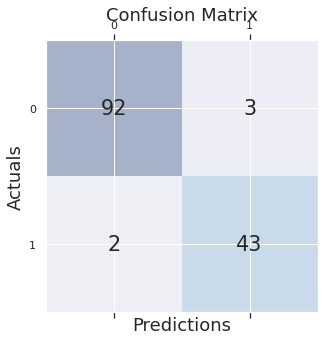

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier as rf

In [39]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [40]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.998211091234347

In [41]:
confusion_matrix(y_train, pred)

array([[363,   0],
       [  1, 195]])

In [42]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [43]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [44]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           2       0.98      0.97      0.97        95
           4       0.93      0.96      0.95        45

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140



In [45]:
cma = confusion_matrix(y_test, pred_test)

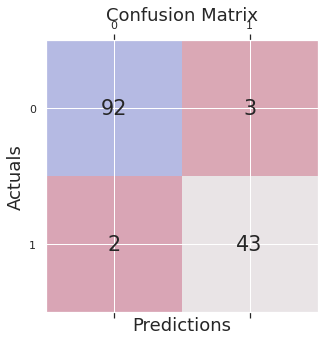

In [46]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [47]:
from sklearn import tree

In [48]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [49]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

0.998211091234347

In [50]:
confusion_matrix(y_train, pred1)

array([[363,   0],
       [  1, 195]])

In [51]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [52]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           2       0.94      0.95      0.94        95
           4       0.89      0.87      0.88        45

    accuracy                           0.92       140
   macro avg       0.91      0.91      0.91       140
weighted avg       0.92      0.92      0.92       140



In [53]:
cma = confusion_matrix(y_test, pred1_test)

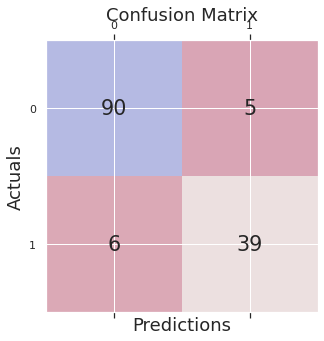

In [54]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [56]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.9570661896243292

In [57]:
confusion_matrix(y_train, pred_LR)

array([[351,  12],
       [ 12, 184]])

In [58]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [59]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           2       0.96      0.98      0.97        95
           4       0.95      0.91      0.93        45

    accuracy                           0.96       140
   macro avg       0.96      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



In [60]:
cma = confusion_matrix(y_test, pred_LR_test)

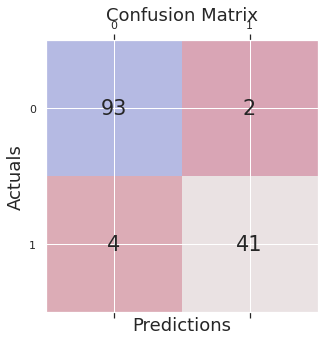

In [61]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [62]:
from sklearn.neural_network import MLPClassifier

In [63]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [64]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.9713774597495528

In [65]:
confusion_matrix(y_train, pred_NN)

array([[350,  13],
       [  3, 193]])

In [66]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [67]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           2       0.99      0.97      0.98        95
           4       0.94      0.98      0.96        45

    accuracy                           0.97       140
   macro avg       0.96      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [68]:
cma = confusion_matrix(y_test, pred_NN_test)

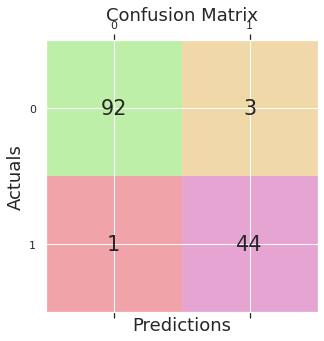

In [69]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [70]:
import xgboost as xgb

In [71]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [72]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.9856887298747764

In [73]:
confusion_matrix(y_train, pred_XGB)

array([[357,   6],
       [  2, 194]])

In [74]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [75]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           2       0.98      0.98      0.98        95
           4       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



In [76]:
cma = confusion_matrix(y_test, pred_XGB_test)

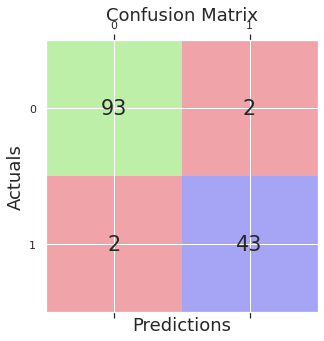

In [77]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

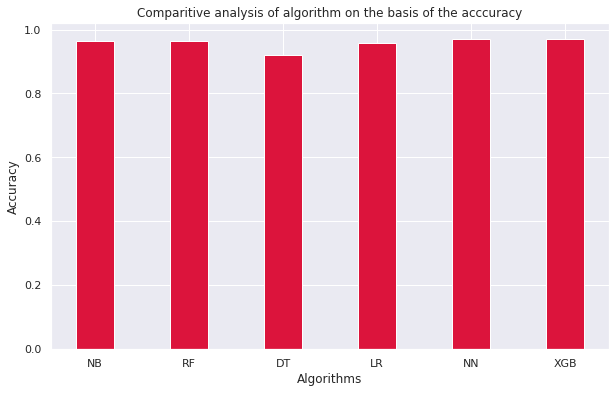

In [78]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


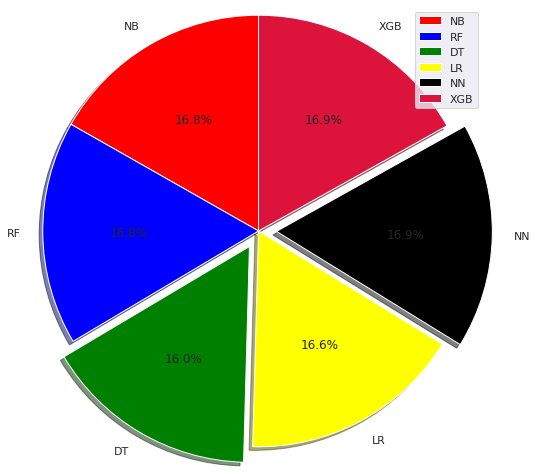

In [79]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [80]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']